# Clothing Classification Neural Network

Sean Moylan

[Adaptation of this tutorial](https://www.tensorflow.org/tutorials/keras/classification)

The aim of this program is to classify an array of diffrent clothing types using Tensorflow, numpy and matplotlib

In [6]:
# Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# Using matplotlib and numpy libraries to help visualise the data
import numpy as np
import matplotlib.pyplot as plt

# Print tensorflow version
print(tf.__version__)

2.0.0


## Import the [Fasion Dataset](https://keras.io/api/datasets/fashion_mnist/) 
This data is a tuple of NumPy arrays made up of:
- test_images and test_labels
- train_images and train_labels

Images are unit8 arrays of grayscale images (ranging from 0 - 255) and shape (num_samples, 28, 28)

Labels are uint8 arrays of labels (int range 0 - 9) and shape (num_samples)

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Create array of classification names

In [8]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
# Display the shape of the data
# Each image is made up of 28 x 28 pixel
train_images.shape

(60000, 28, 28)

In [14]:
# Display the number of labels in the data
train_labels.size

60000

In [15]:
# Display the integer array
# The integer value corresponds to class_name
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
# Test images dataset is made up of 10'000 images
test_images.shape

(10000, 28, 28)

In [18]:
# There is a test label for each test image also
test_labels.size

10000

## Preprocess the data

Using the matplotlib library we can display the images as follows.

Here we can also get a better understanding of the 0 - 255 scale of the images

<function matplotlib.pyplot.show(*args, **kw)>

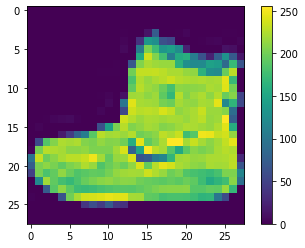

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show

Now we need to scale the data to values between 0 and 1

"Unscaled input variables can result in a slow or unstable learning process, whereas unscaled target variables on regression problems can result in exploding gradients causing the learning process to fail" -
[Data scaling](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)



In [24]:
# We can simply scale the data by dividing by 255
# It is important that we do the same for both the training and test data

train_images = train_images / 255.0 
test_images = test_images / 255.0

# Display the first 25 images

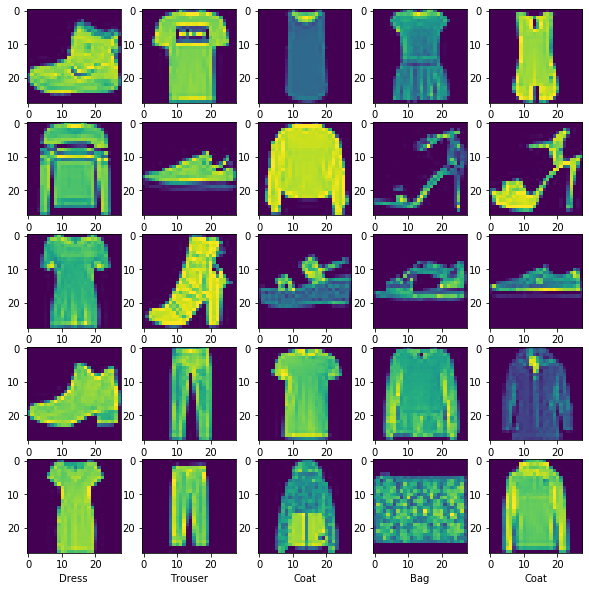

In [27]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_name[train_labels[i]])
plt.show()

## Build the Model 

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
[https://keras.io/guides/sequential_model/]

First we state the shape of the input for the input layer as (28 x 28) which is flattened into a 1 dementional array of 28 x 28 = 784 pixels. This means we have 784 input nodes to our NN.

Next we create a hidden layer of 128 nodes that use the 'relu' or rectified linear activation function. [Other Activation Functions](https://keras.io/api/layers/activations/)

We then create the output layer that consists of 10 possible outcomes which we stated as class_names, these are the possible types of clothing the NN will predict. These 10 output nodes will be floating point numbers corresponding to the probability that the given image is of a certain classification

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

## Compile the model

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [32]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

## Train the model

First we pass the model the training images and labels which it will learn to associate

During the training stage it will display the loss and accuracy of the model which we stated during the compiling phase. You will see that the loss will decrease and accuracy increase as the model is trained 

In [35]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2300 - accuracy: 0.9143
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2210 - accuracy: 0.9164
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2165 - accuracy: 0.9190
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2096 - accuracy: 0.9208
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2021 - accuracy: 0.9232
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1977 - accuracy: 0.9261
Epoch 7/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1909 - accuracy: 0.9292
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1863 - accuracy: 0.9300
Epoch 9/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1810 - accuracy: 0.9311
Epoch 10/10
60

In [44]:
# Evaluate the accuracy of the model by using the test images

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\nTest accuracy: ', round((test_acc * 100), 2),'%')

10000/1 - 0s - loss: 0.2236 - accuracy: 0.8895

Test accuracy:  88.95 %


As you can see the accuracy of the test data is not as good as the training data, this is known as overfitting.

"Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data." - TensorFlow website

## Make Predictions

Here we attach a softmax layer to convert the logits to probabilities. In simple terms we turn the non-normalized data into normalized data.

In [45]:

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [46]:
predictions = probability_model.predict(test_images)

Now we have an matrix of prediction, the matrix consists of an array for each of the 10000 images with a higher value given to the classifcation the NN predicts it is.

In [50]:
predictions[0]

array([6.7477662e-11, 1.8936453e-18, 2.1053769e-08, 7.0687262e-11,
       6.6768785e-11, 1.3132079e-05, 1.5269498e-08, 4.7578872e-03,
       8.7935985e-11, 9.9522901e-01], dtype=float32)

In [53]:
# Here we show that it predicts that the first image in the test set is a Ankle boot 
class_name[np.argmax(predictions[0])]

'Ankle boot'

These two methods are used to display the data.

The following links are useful to understanding the matplotlib and numpy libraries that are used here.

- [Matplotlib](https://matplotlib.org/contents)
- [Numpy](https://numpy.org/doc/stable/)

In [60]:
# Used to plot image and corresponding label
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)
# Used to display a graph of the prediction for each classification
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify Predictions

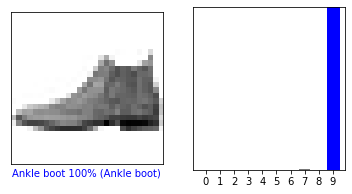

In [61]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

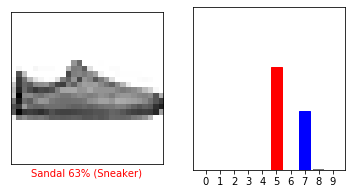

In [62]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

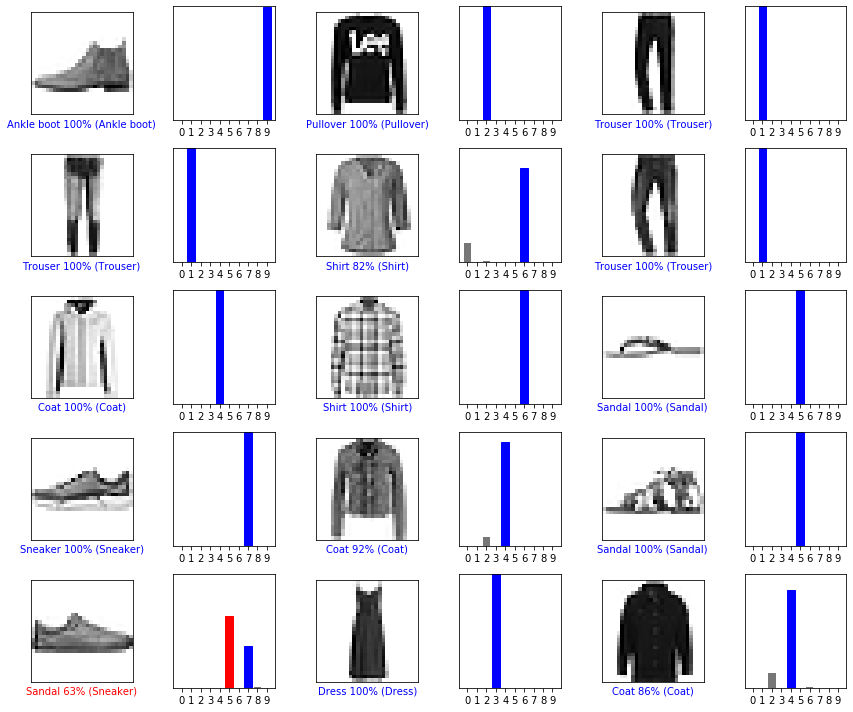

In [63]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()